In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import re
import string
import spacy

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
# dataset link - https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
df = pd.read_csv("/content/drive/MyDrive/AI/spam.csv", encoding='ISO-8859-1')

In [ ]:
# df.drop("Unnamed: 0", inplace=True, axis=1)
df.head()

,Unnamed: 0,category,message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 3)

In [ ]:
df.describe()

,Unnamed: 0
count,5572.000000
mean,2785.500000
std,1608.642181
min,0.000000
25%,1392.750000
50%,2785.500000
75%,4178.250000
max,5571.000000


In [ ]:
df["length"] = df["message"].apply(len)

In [ ]:
df.sort_values(by='length', ascending=False).head(10)  # The maximum length messages in descending order

,Unnamed: 0,category,message,length
1084,1084,ham,For me the love should start with attraction.i...,910
1862,1862,ham,The last thing i ever wanted to do was hurt yo...,790
2433,2433,ham,Indians r poor but India is not a poor country...,632
1578,1578,ham,How to Make a girl Happy? It's not at all diff...,611
2157,2157,ham,Sad story of a Man - Last week was my b'day. M...,588
2847,2847,ham,Sad story of a Man - Last week was my b'day. M...,588
2379,2379,ham,"Good evening Sir, hope you are having a nice d...",482
3015,3015,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1512,1512,ham,"Hey sweet, I was wondering when you had a mome...",458
2369,2369,ham,A Boy loved a gal. He propsd bt she didnt mind...,450


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c5145a880>,
      dtype=object)

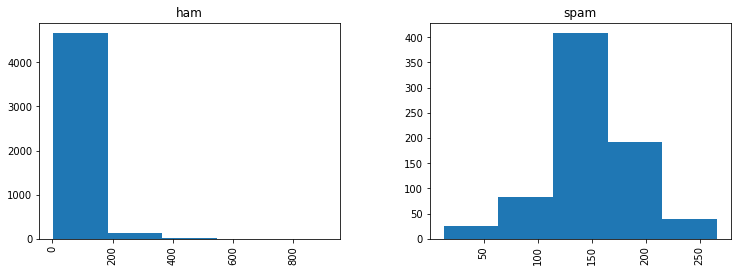

In [ ]:
df.hist(column='length', by='category', figsize=(12,4), bins=5)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


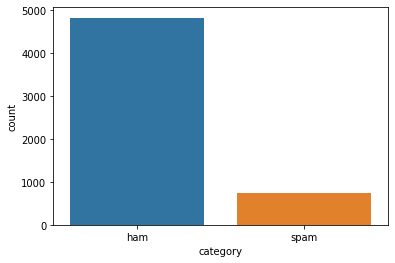

In [ ]:
sns.countplot(df['category'])

In [ ]:
df['spam'] = df['category'].apply(lambda x: 1 if x =='spam' else 0)
df.head()

,Unnamed: 0,category,message,length,spam
0,0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,1,ham,Ok lar... Joking wif u oni...,29,0
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,3,ham,U dun say so early hor... U c already then say...,49,0
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


###Text Preprocessing

The Preprocessing steps taken are:

Lower Casing and Removing Punctuation

Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")

Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. (eg: "the", "he", "have")

Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)



In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def text_preprocessing(message):
  
    #remove punctuation
    message_not_punc = []
    
    for word in message:
        if word not in string.punctuation:
            message_not_punc.append(word)
            
    message_not_punc = ''.join(message_not_punc) 

    message_clean = list(message_not_punc.split(" "))
    
    #remove stop words
    all_stopwords = nlp.Defaults.stop_words;
    
    text_tokens = message_clean
    tokens_without_sw = [word.lower() for word in text_tokens if not word in all_stopwords]

    tokens_without_sw = ' '.join(tokens_without_sw)
    
    doc = nlp(tokens_without_sw)
    
    #lemmatization
    after_lemmatization = []
    
    for token in doc:
        after_lemmatization.append(token.lemma_)
    
    after_lemmatization = ' '.join(after_lemmatization)
    
    return (after_lemmatization)
    

In [ ]:
df["message"].head(5).apply(text_preprocessing)

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                                  u dun early hor u c
4                       nah I do not think go usf life
Name: message, dtype: object

In [ ]:
df['message'].apply(text_preprocessing)


###Vectorization

In [ ]:
# cv = CountVectorizer()
# X = cv.fit_transform(df['message'])
# X

cv = TfidfVectorizer()
X = cv.fit_transform(df['message']).toarray()

In [ ]:
X.shape
cv.get_feature_names_out()[1000:1010] # vocabulary

###Train-Test Split

In [ ]:
from imblearn.combine import SMOTETomek 
smk= SMOTETomek() #synthetic minority oversampling technique

#handling dataset imbalance using oversampling of the minority class
X_bal, y_bal = smk.fit_resample(X, df['spam'])


X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2)

In [ ]:
X_train.shape

(7720, 8665)

In [ ]:
X_test.shape

(1930, 8665)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

###Evaluating Model

accuracy score: 0.9813471502590674
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       954
           1       0.98      0.98      0.98       976

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



Text(0.5, 1.0, 'Confusion Matrix')

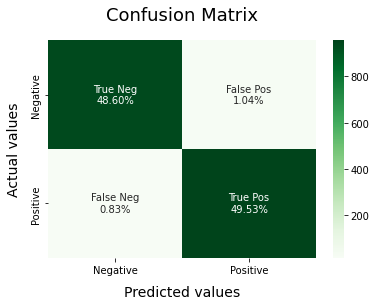

In [ ]:
print("accuracy score:",accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
cf_matrix = confusion_matrix(y_test, y_pred)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Greens',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
sample_emails = [
    "Ready to be more productive at work? Join us online February 28th, 2023! Unlock your full potential at ClickUp’s annual productivity conference! Join us online at LevelUp on February 28th, 2023 to learn creative ideas that save you time, improve team collaboration, and let your work flow.",
    "upto 20% discount on parking. exclusive offer just for you",
    "Here is your discount code RP176781. To stop further messages reply stop. www.regalportfolio.co.uk. Customer Services 08717205546",
    "LOL ... Have you made plans for new years?",
    "Congrats on your new iPhone! Click here to claim your prize...",
    "Really like that new photo of you",
    "Did you hear the news today? Terrible what has happened...",
    "Attend this free COVID webinar today: Book your session now"
]

emails_cv = cv.transform(sample_emails)
model.predict(emails_cv)

array([0, 1, 1, 0, 1, 0, 0, 1])